In [1]:
#Instalar librerias

!pip install statsmodels
!pip install wquantiles

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("asinow/car-price-dataset")

print("Path to dataset files:", path)

100%|██████████| 135k/135k [00:00<00:00, 45.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/asinow/car-price-dataset/versions/1


In [14]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import seaborn as sns
import wquantiles
import matplotlib.pyplot as plt

In [17]:
from google.colab import files
uploaded = files.upload()

Saving walmart_stock_prices.csv to walmart_stock_prices.csv


In [18]:
import pandas as pd

df_walmart = pd.read_csv("walmart_stock_prices.csv")
df_walmart.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1972-08-25 00:00:00-04:00,0.011463,0.011683,0.011463,0.011639,7526400,0.0,0.0
1,1972-08-28 00:00:00-04:00,0.011639,0.011727,0.011595,0.011595,2918400,0.0,0.0
2,1972-08-29 00:00:00-04:00,0.011551,0.011551,0.011463,0.011463,5836800,0.0,0.0
3,1972-08-30 00:00:00-04:00,0.011463,0.011463,0.011374,0.011463,1228800,0.0,0.0
4,1972-08-31 00:00:00-04:00,0.011374,0.011374,0.011286,0.011286,2611200,0.0,0.0


In [20]:
df_walmart.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
13228,2025-02-14 00:00:00-05:00,105.300003,105.300003,103.599998,104.040001,14109500,0.0,0.0
13229,2025-02-18 00:00:00-05:00,103.720001,103.989998,102.510002,103.779999,18247300,0.0,0.0
13230,2025-02-19 00:00:00-05:00,103.849998,104.199997,102.550003,104.000000,18508000,0.0,0.0
13231,2025-02-20 00:00:00-05:00,98.779999,100.120003,96.680000,97.209999,55450900,0.0,0.0
13232,2025-02-21 00:00:00-05:00,96.529999,96.849998,94.120003,94.779999,34972500,0.0,0.0


In [21]:
df_walmart["Date"] = pd.to_datetime(df_walmart["Date"])

<ipython-input-21-2bb523f59379>:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_walmart["Date"] = pd.to_datetime(df_walmart["Date"])


In [22]:
df_walmart.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13233 entries, 0 to 13232
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          13233 non-null  object 
 1   Open          13233 non-null  float64
 2   High          13233 non-null  float64
 3   Low           13233 non-null  float64
 4   Close         13233 non-null  float64
 5   Volume        13233 non-null  int64  
 6   Dividends     13233 non-null  float64
 7   Stock Splits  13233 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 827.2+ KB


In [23]:
df_walmart.sample(10)


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
8103,2004-10-04 00:00:00-04:00,11.844003,11.936881,11.786508,11.788720,26326500,0.0,0.0
12214,2021-02-02 00:00:00-05:00,43.942737,44.694189,43.842124,44.260296,27002400,0.0,0.0
5251,1993-06-09 00:00:00-04:00,2.739911,2.765638,2.714184,2.739911,11995200,0.0,0.0
12619,2022-09-12 00:00:00-04:00,44.306752,44.684916,44.271197,44.626740,14284500,0.0,0.0
1604,1979-01-05 00:00:00-05:00,0.017209,0.017392,0.017209,0.017209,36864000,0.0,0.0
8596,2006-09-18 00:00:00-04:00,10.895827,11.011547,10.814143,10.913980,32491500,0.0,0.0
7356,2001-10-15 00:00:00-04:00,11.403016,11.589382,11.357507,11.589382,18779100,0.0,0.0
1474,1978-06-30 00:00:00-04:00,0.017131,0.017313,0.017040,0.017040,1996800,0.0,0.0
7374,2001-11-08 00:00:00-05:00,11.832085,12.005449,11.699896,11.810415,25752300,0.0,0.0
1719,1979-06-20 00:00:00-04:00,0.019558,0.019558,0.018916,0.019099,3456000,0.0,0.0


In [24]:
list(df_walmart.columns)

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']

In [25]:
df_walmart.describe()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,13233.000000,13233.000000,13233.000000,13233.000000,1.323300e+04,13233.000000,13233.000000
mean,11.942685,12.047041,11.840625,11.946184,2.244184e+07,0.000922,0.001587
std,15.857590,15.979783,15.739790,15.865461,1.839004e+07,0.011606,0.058295
min,0.002839,0.002839,0.002617,0.002839,0.000000e+00,0.000000,0.000000
25%,0.331929,0.335493,0.329170,0.332387,1.190220e+07,0.000000,0.000000
50%,7.361626,7.430911,7.237296,7.350794,1.875690e+07,0.000000,0.000000
75%,14.864691,15.031126,14.768921,14.910342,2.801850e+07,0.000000,0.000000
max,105.300003,105.300003,103.599998,105.050003,3.955008e+08,0.208000,3.000000


In [26]:
df_walmart["Open"].mean()

11.942685409473063

In [27]:
from scipy.stats import trim_mean
trim_mean(df_walmart["Open"], 0.1)

8.56963917546089

In [28]:
import numpy as np
np.average(df_walmart["Close"], weights=df_walmart["Volume"])

13.813066414883993

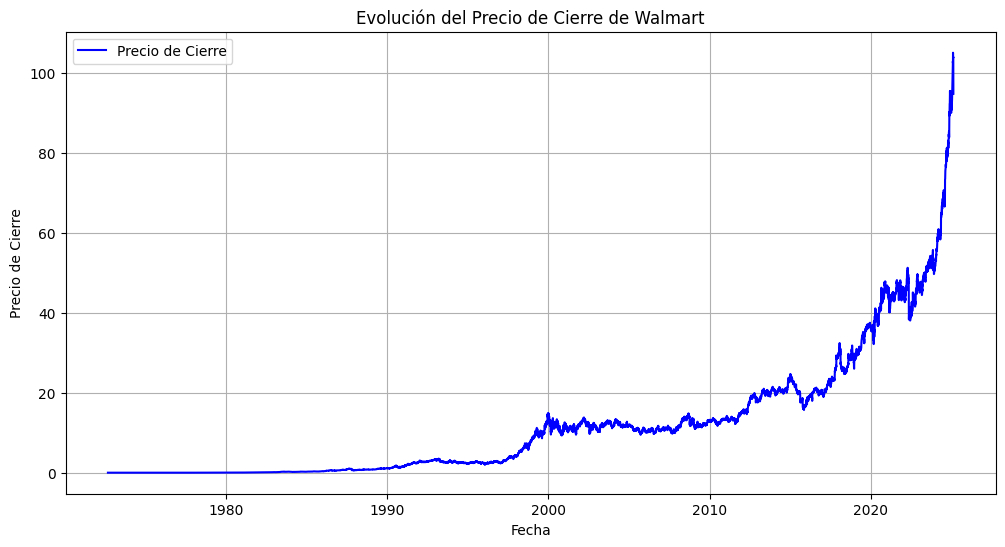

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_walmart["Date"], df_walmart["Close"], label="Precio de Cierre", color="blue")
plt.title("Evolución del Precio de Cierre de Walmart")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre")
plt.legend()
plt.grid()
plt.show()

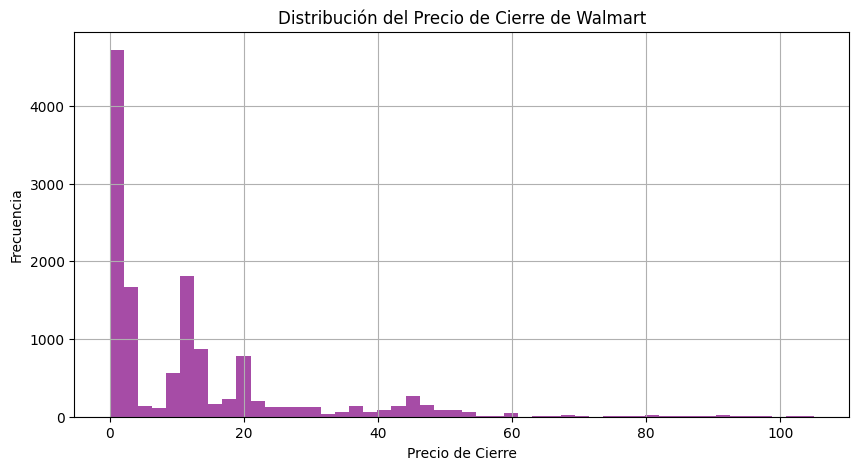

In [30]:
plt.figure(figsize=(10, 5))
plt.hist(df_walmart["Close"], bins=50, color="purple", alpha=0.7)
plt.title("Distribución del Precio de Cierre de Walmart")
plt.xlabel("Precio de Cierre")
plt.ylabel("Frecuencia")
plt.grid()
plt.show()

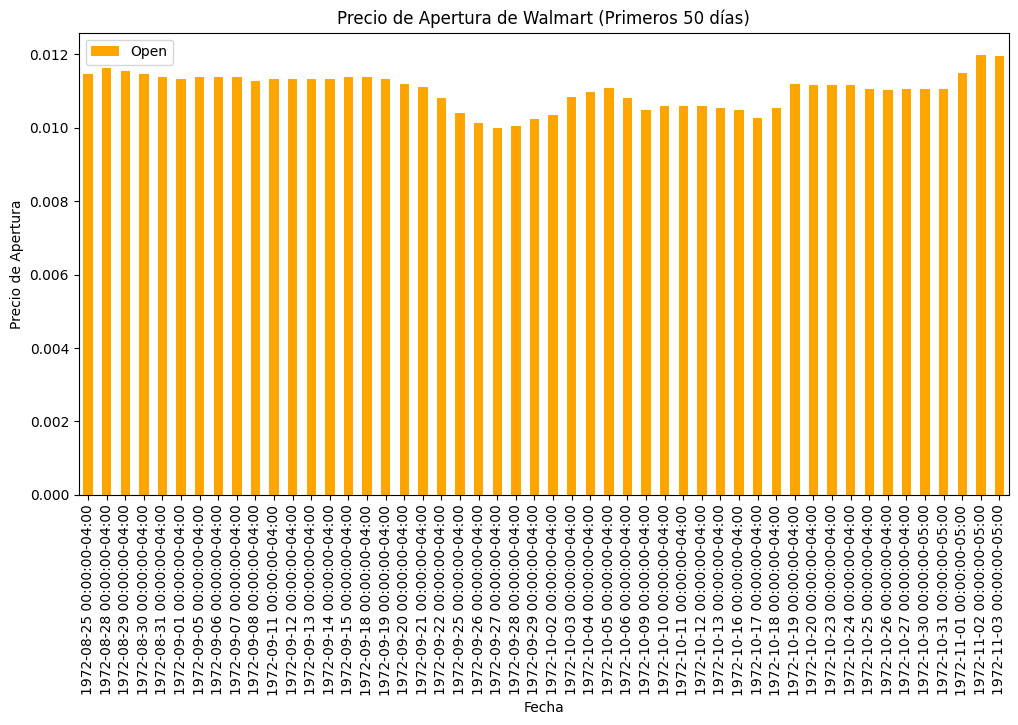

In [31]:
df_walmart.head(50).plot(x="Date", y="Open", kind="bar", figsize=(12, 6), color="orange")
plt.title("Precio de Apertura de Walmart (Primeros 50 días)")
plt.xlabel("Fecha")
plt.ylabel("Precio de Apertura")
plt.xticks(rotation=90)
plt.show()

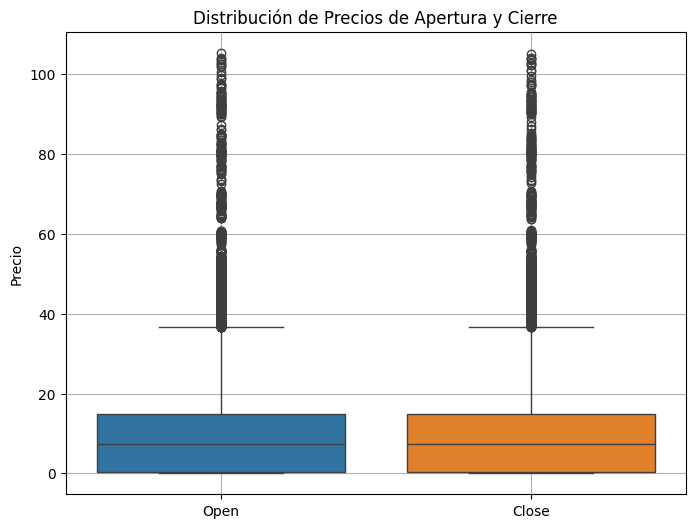

In [34]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_walmart[["Open", "Close"]])
plt.title("Distribución de Precios de Apertura y Cierre")
plt.ylabel("Precio")
plt.grid()
plt.show()